<a href="https://colab.research.google.com/github/Tusharsingh7336/END-TO-END-DOG-IMAGE-CLASSIFICATION/blob/main/Dog_vision_ipyng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-to-end multi-class dog breed classification
## 1. Problem
Identifying the breed of a dog given an image of a dog.

When I'm sitting at the cafe and I take a photo of a dog, I want to know what breed of dog it is.

## 2. Data
The data we're using is from Kaggle's dog breed identification competition.

https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evaluation
The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features
Some information about the data:

* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10,000+ images in the training set (these images have labels).
* There are around 10,000+ images in the test set (these images have no labels, because we'll want to predict them).


In [1]:
#Unzip the file
# !unzip "/content/drive/MyDrive/Dog vision/dog-breed-identification (1).zip" -d "/content/drive/MyDrive/Dog vision/"

# Get our workspace ready
* Import TensorFlow 2.x 
* Import TensorFlow Hub 
* Make sure we're using a GPU

In [2]:
#import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF version", tf.__version__)
print("TF HUB",hub.__version__)

#check the availability of gpu
print("GPU","available" if tf.config.list_physical_devices("GPU") else "not available")

TF version 2.9.2
TF HUB 0.12.0
GPU available


## Getting our data ready
With all machine learning models, our data has to be in numerical format. So that's what we'll be doing first. Turning our images into Tensors (numerical representations).

Let's start by accessing our data and checking out the labels.

In [3]:
#checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/Dog vision/labels.csv")
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [4]:
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


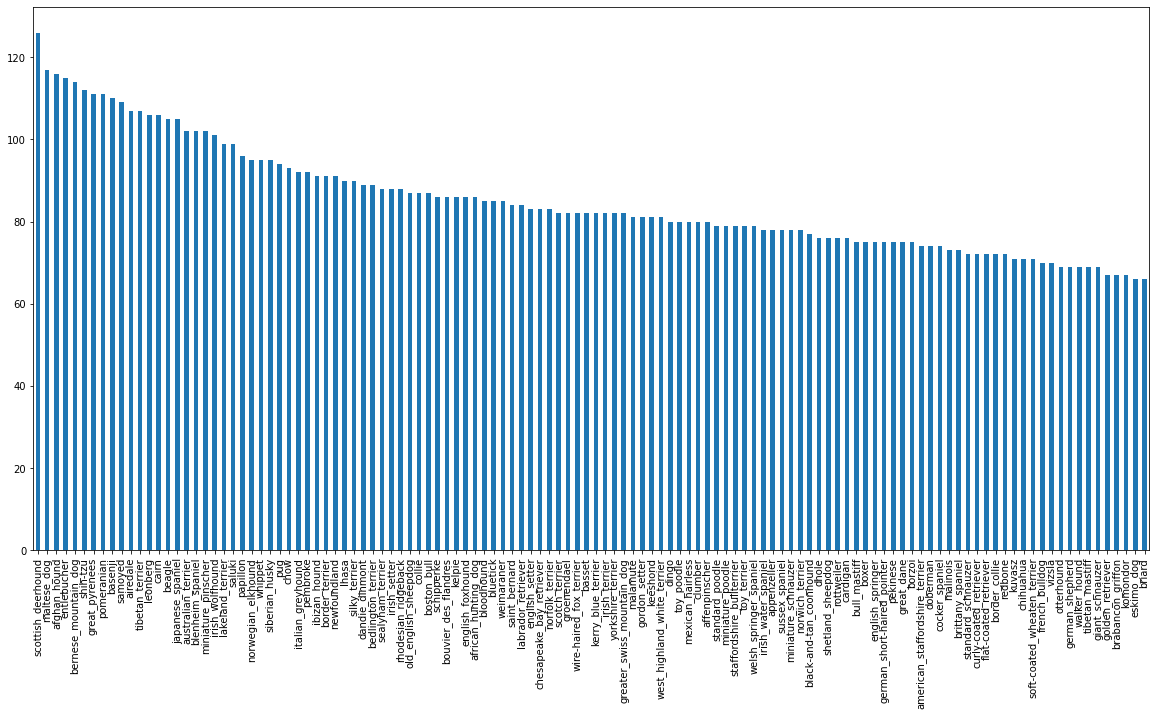

In [5]:
#how many images of each breed are there
labels_csv["breed"].value_counts().plot.bar(figsize= (20,10))

In [6]:
labels_csv.breed.value_counts().median()

82.0

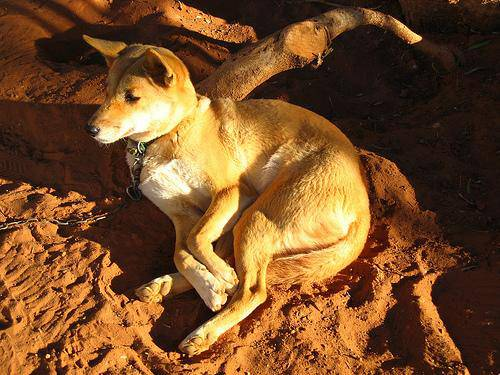

In [7]:
#let's view an image
from IPython.display import Image
Image("/content/drive/MyDrive/Dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting image and their labels
* let's get a list of all the image file pathname

In [8]:
#create a pathname from iamge id
filenames = ["/content/drive/MyDrive/Dog vision/train/" + fname +".jpg" for fname in labels_csv["id"]]

In [9]:
filenames[:10]

['/content/drive/MyDrive/Dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Dog vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Dog vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Dog vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Dog vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Dog vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [10]:
#check wheather no of filenames matches no of actual image files
import os
if len(os.listdir("/content/drive/MyDrive/Dog vision/train/")) == len(filenames):
  print("filenames matches actual amount of files")
else:
  print("filename size do not matches ")


filenames matches actual amount of files


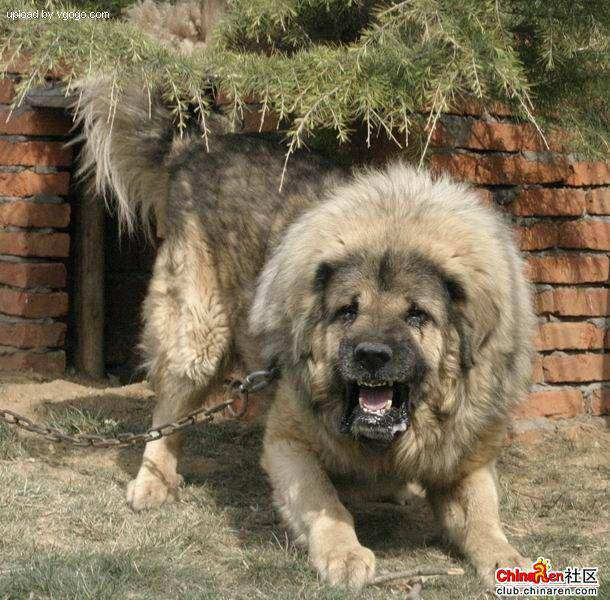

In [11]:
Image(filenames[9000])

In [12]:
labels_csv.breed[9000]

'tibetan_mastiff'

In [13]:
# Since we've got ourn training image filepath in a list.let's prepare our labels


In [14]:
import numpy as np
labels = labels_csv["breed"].to_numpy() 
# labels = np.array(labels) # does same thing as above
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [15]:
#see if no of labels matches no of filenames
if len(labels) == len(filenames):
  print("No of labels matches no of filenames")
else:
  print("Does not match")

No of labels matches no of filenames


In [16]:
len(labels)

10222

In [17]:
#find the unique labels
unique_breeds = np.unique(labels)

In [18]:
len(unique_breeds)

120

In [19]:
#turn single labels into an array of boolean
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [20]:
#turn every label into boolean
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [21]:
len(boolean_labels)

10222

In [22]:
#example: tuning boolean array into integer
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs


boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [23]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [24]:
filenames[:10]

['/content/drive/MyDrive/Dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Dog vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Dog vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Dog vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Dog vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Dog vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

### creating our own validation set
since the dataset does not have validation set, we are going to create it

In [25]:
#set up x and y
x = filenames
y = boolean_labels

### we are going to start with 1000 images and increase if needed


In [26]:
#setbno of images used for experimantation
NUM_IMAGES = 1000# @param{type:"slider",min:1000,max:10000,step:1000}

In [27]:
#let's split data into train and validation set
from sklearn.model_selection import train_test_split
#split into train and validation
x_train,x_val,y_train,y_val = train_test_split(x[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2,random_state=42)

In [28]:
len(x_train),len(x_val),len(y_train),len(y_val)

(800, 200, 800, 200)

In [29]:
x_train[:4],y_train[:2]

(['/content/drive/MyDrive/Dog vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/MyDrive/Dog vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  '/content/drive/MyDrive/Dog vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  '/content/drive/MyDrive/Dog vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, 

## Preprocessing Images(Turning images into Tensor)
To preprocess our images into Tensors we're going to write a function which does a few things: 

1.Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, image
3. Turn our image (a jpg) into Tensors
4. Normalize our image (convert color channel values from from 0-255 to 0-1).
5. Resize the image to be a shape of (224, 224)
6. Return the modified image

Before we do, let's see what importing an image looks like.

In [30]:
#convert image into numpy array
from matplotlib.pyplot import imread

In [31]:
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [32]:
image.min(),image.max()

(0, 255)

In [33]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [34]:
#turn image into tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [35]:
#Resize the image
IMG_SIZE = 224

#create a function for preprocessing images
def process_image(image_path,img_size=IMG_SIZE):
  """
  Takes an image filepath and turn image into tensor
  """
  #Read in an image file
  image = tf.io.read_file(image_path)
  #turn jpg image into numerical tensor with 3 color channel
  image = tf.image.decode_jpeg(image,channels=3)
  #convert the colour channel from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image,tf.float32)
  #resize the image tp our desired value
  image = tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

  return image



## Turning our data into batches

Why turn data into batches?

let's say we are trying to process 10,000+ images in one go... they might not fit into memory

So that's why we do about 32 (this is batch size) images at a time(we can adjust it)

In order to use tensorflow effectively, we need our data in the form of tensor tuples which look likw this:`(image,label)`

In [36]:
#create a simple function to return tuple
def get_image_label(image_path,label):
  image = process_image(image_path)
  return image, label


In [37]:
#demo of above
(process_image(x[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got a way to turn our data into tuples od tensor,let's make a function to turn all our data into batches


In [38]:
#define batch size
BATCH_SIZE = 32
# crate a funt to turn data into batches
def create_data_batches(x,y=None,batch_size=BATCH_SIZE,val_data=False,test_data=False):
  """ 
  create batches of data out of image(x) and label(y)
  shuffle data if it is training data
  also accept test data as input(no label)

  """
  #if the data is test data
  if test_data:
    print("creating test data batches....")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))#only file path no label
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

#if valid data
  elif val_data:
    print("creating valid data batches....")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),#filepath
                                               tf.constant(y)))#label
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("creating train data batches...")
    data =tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                              tf.constant(y)))
    #shuffle traing  data
    data = data.shuffle(buffer_size=len(x))
    data = data.map(get_image_label)
    data_batch = data.batch(BATCH_SIZE)
    return data_batch





In [39]:
#creating training and val data set
train_data = create_data_batches(x_train,y_train)
val_data = create_data_batches(x_val,y_val,val_data=True)

creating train data batches...
creating valid data batches....


In [40]:
#check out the diff attributes of our data batches
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualize data batches
our data is now in batches, however they can be little hard to unerstand

In [41]:
import matplotlib.pyplot as plt
#create a function
def show_25_images(images,labels):
  """
  Display a plot of 25 images
  """
  #setup a fig
  plt.figure(figsize=(10,10))
  #loop through 25(for display 25 images)
  for i in range(25):
    #create subplot
    ax=plt.subplot(5,5,i+1)

    #display image
    plt.imshow(images[i])
    #add image title
    plt.title(unique_breeds[labels[i].argmax()])
    #turn grid off
    plt.axis("off")

In [42]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [43]:
train_image,train_labels = next(train_data.as_numpy_iterator())
#train_image,train_labels

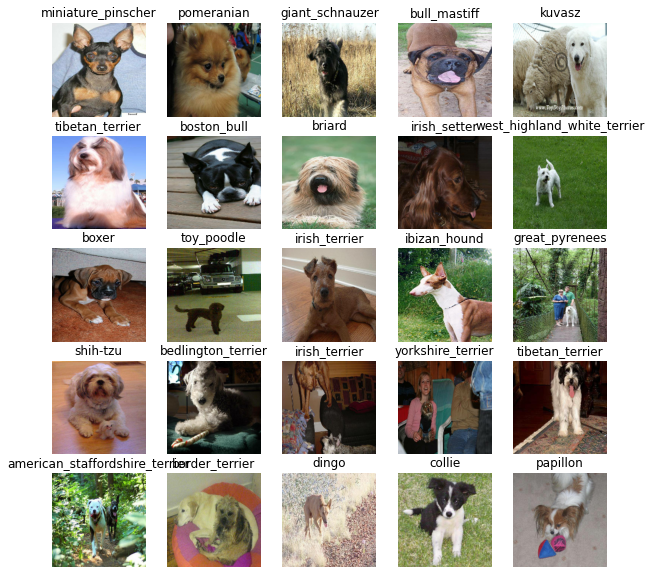

In [44]:
show_25_images(train_image,train_labels)

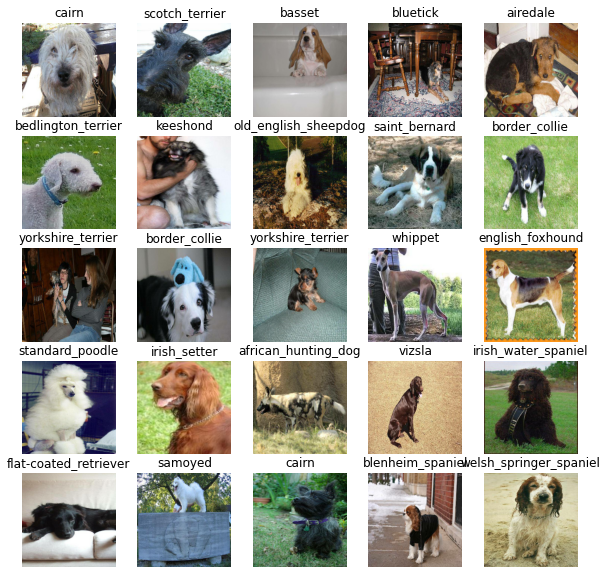

In [45]:
#visualize val data
val_image,val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_image,val_labels)

## Building a model
Before we build a model, there are a few things we need to define:

* The input shape (our images shape, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use from TensorFlow Hub - https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5

In [46]:
#setup intup shape to the model
INPUT_SHAPE = [None,IMG_SIZE,IMG_SIZE,3]
#setuo output shape
OUTPUT_SHAPE = len(unique_breeds)
#setup model url from tensorflow
MODEL_URL ="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

In [47]:
INPUT_SHAPE

[None, 224, 224, 3]

Now we've got our inputs, outputs and model ready to go. Let's put them together into a Keras deep learning model!

Knowing this, let's create a function which:

* Takes the input shape, output shape and the model we've chosen as parameters.
* Defines the layers in a Keras model in sequential fashion (do this first, then this, then that).
* Compiles the model (says it should be evaluated and improved).
* Builds the model (tells the model the input shape it'll be getting).
* Returns the model.

All of these steps can be found here: https://www.tensorflow.org/guide/keras/overview

In [48]:
#create a function which builds a kennal
def create_model(input_shape = INPUT_SHAPE,output_shape= OUTPUT_SHAPE,model_url=MODEL_URL):
  print("Building a machine learning model:",MODEL_URL)

  #setup model layer
  model = tf.keras.Sequential([hub.KerasLayer(MODEL_URL),#first layer(input)
                              tf.keras.layers.Dense(units=OUTPUT_SHAPE,activation="softmax")#layer 2(output layer)
                               ])
  #complie the model
  model.compile(loss= tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
  #build the model
  model.build(INPUT_SHAPE)
  return model

In [49]:
model = create_model()
model.summary()

Building a machine learning model: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks
Callbacks are helper functions a model can use during training to do such things as save its progress,check its progress or stop training if the model stops imporving

We'll create 2 callbacks 

-one for Tensorborad which helps track our model
- second for earlt stopping which prevents from training our model too long
 

## TensorBoard Callback
To setup a TensorBoard callback, we need to do 3 things:

1. Load the TensorBoard notebook extension ✅
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's fit() function. ✅
3. Visualize our models training logs with the %tensorboard magic function (we'll do this after model training).
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard

In [50]:
#load tensorboard notebook extension
%load_ext tensorboard

In [51]:
import datetime
#create a functiom to build a tensorboard callback
def create_tensorboard_callback():
  #create a log directory for strong tensorboard logs
  logdir = os.path.join ("/content/drive/MyDrive/Dog vision/logs", datetime.datetime.now().strftime("%y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

# Early stopping callbacks
Early stopping hepls our model from overfitting by stopping training if a certain evaluation metric stops improving

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [52]:
#create early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training our model(on the subset)
our first model is only going to train on 1000 images,to make sure it's working


In [53]:
NUM_EPOCHS = 100#@param{type:"slider",min:10,max:100,step:10}

#let's create a function which train a model
* Create a model using create_model()
* Setup a TensorBoard callback using create_tensorboard_callback()
* Call the fit() function on our model passing it the training data, validation data, number of epochs to train for (NUM_EPOCHS) and the callbacks we'd like to use
* Return the model

In [54]:
def train_model():
  """
  Trains a given model and return trained version
  """
  model = create_model()
  #create new tensorboard session everytime we train a model
  tensorboard = create_tensorboard_callback()
  #fit the model to the data passing its callback featue
  model.fit(x=train_data,epochs=NUM_EPOCHS,validation_data=val_data,validation_freq=1,callbacks=[tensorboard,early_stopping])

  return model

In [55]:
model = train_model()

Building a machine learning model: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 113s 3s/step - loss: 4.5044 - accuracy: 0.1013 - val_loss: 3.6512 - val_accuracy: 0.2200
Epoch 2/100
25/25 [==============================] - 3s 135ms/step - loss: 1.5953 - accuracy: 0.6925 - val_loss: 2.3267 - val_accuracy: 0.4700
Epoch 3/100
25/25 [==============================] - 3s 135ms/step - loss: 0.5506 - accuracy: 0.9425 - val_loss: 1.8175 - val_accuracy: 0.5700
Epoch 4/100
25/25 [==============================] - 4s 159ms/step - loss: 0.2490 - accuracy: 0.9887 - val_loss: 1.6049 - val_accuracy: 0.5950
Epoch 5/100
25/25 [==============================] - 4s 160ms/step - loss: 0.1447 - accuracy: 0.9962 - val_loss: 1.5311 - val_accuracy: 0.6100
Epoch 6/100
25/25 [==============================] - 4s 159ms/step - loss: 0.0994 - accuracy: 1.0000 - val_loss: 1.4816 - val_accuracy: 0.6250
Epoch 7/100
25/25 [=================

## Making and evaluating predicitons


In [57]:
predictions = model.predict(val_data,verbose=1)
predictions

7/7 [==============================] - 3s 113ms/step


array([[7.23680772e-04, 7.94725202e-05, 9.03821492e-04, ...,
        6.12507283e-04, 3.45670633e-05, 5.31923678e-03],
       [8.90122028e-04, 1.90618914e-03, 3.42812669e-03, ...,
        3.71907256e-03, 5.27559221e-03, 7.65006698e-04],
       [1.15833723e-06, 7.42480624e-05, 3.13964811e-05, ...,
        2.41988400e-05, 2.53519938e-05, 4.94134365e-05],
       ...,
       [8.80545213e-06, 2.63326772e-04, 3.25085130e-04, ...,
        5.16933760e-05, 2.61894485e-04, 1.25767809e-04],
       [5.33305807e-03, 1.04030696e-04, 8.90659794e-05, ...,
        1.97219313e-04, 6.23897649e-05, 9.23470873e-03],
       [1.01957808e-03, 4.13634807e-05, 4.64416388e-03, ...,
        6.22218102e-03, 3.36462399e-04, 5.72366334e-05]], dtype=float32)

In [58]:
predictions[0]

array([7.23680772e-04, 7.94725202e-05, 9.03821492e-04, 6.58165809e-05,
       6.49685797e-04, 3.77749602e-05, 1.09001361e-02, 4.52614244e-04,
       9.35208576e-04, 3.15981079e-03, 7.04218168e-04, 1.06591295e-04,
       8.44449911e-04, 3.39360791e-04, 4.57591726e-04, 5.81085042e-04,
       7.08169755e-05, 1.19216815e-01, 9.33755946e-05, 5.55822844e-05,
       2.75088270e-04, 6.47535053e-05, 3.28572241e-05, 3.25629674e-03,
       7.79055845e-05, 3.84772684e-05, 1.90254465e-01, 2.27012337e-04,
       5.84155146e-04, 5.48570708e-04, 4.96164022e-04, 2.04908988e-03,
       3.06676113e-04, 2.34169875e-05, 2.96147500e-05, 2.88400017e-02,
       5.95920283e-05, 2.60523200e-04, 2.88101466e-04, 1.60303607e-04,
       1.06995471e-03, 1.06885891e-04, 4.89902777e-05, 5.11190701e-05,
       7.85098746e-05, 1.59079180e-04, 5.67083371e-05, 4.95502718e-05,
       2.21039925e-04, 7.14535054e-05, 1.65448830e-04, 7.69908365e-05,
       1.82771881e-04, 7.02253456e-05, 3.13039607e-04, 2.07995708e-05,
      

In [59]:
#first pred
index=42
print(f"Max value(Probability of prediciton):{np.max(predictions[index])}")

print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

Max value(Probability of prediciton):0.5877631902694702
Sum: 1.0
Max index: 113
Predicted label: walker_hound


In [60]:
unique_breeds[51]

'great_dane'

Having the the above functionality is great but we want to be able to do it at scale.

And it would be even better if we could see the image the prediction is being made on!

Note: Prediction probabilities are also known as confidence levels.

In [61]:
#turn predicitons probabiilites into respective labels
def get_pred_label(prediction_probabilities):
  """
  Turn an array of prediciton probablity into a label
  """
  return unique_breeds[np.argmax(prediction_probabilities)]


In [62]:
#get predicted label
pred_label = get_pred_label(predictions[0])
pred_label

'irish_wolfhound'

In [63]:
val_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

Since our validation data still in batch data
unbatch tha data will be our next step

In [64]:
#create a function to unbatch]
def unbatchify(data):
  """
  Takes a batch dataset and unbatch it
  """
  images=[]
  labels=[]
  #loop through data
  for image,label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])

  return images,labels


   #unbatch val data
val_images,val_labels = unbatchify(val_data)
val_images[0],val_labels[0] 


(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [65]:
get_pred_label(labels[0])

'affenpinscher'

Now we've got ways to get get:

* Prediction labels
* Validation labels (truth labels)
* Validation images

Let's make some function to make these all a bit more visaulize.

We'll create a function which:

* Takes an array of prediction probabilities, an array of truth labels and an array of images and an integer. ✅
* Convert the prediction probabilities to a predicted label. ✅
* Plot the predicted label, its predicted probability, the truth label and the target image on a single plot. ✅

In [66]:
def plot_pred(prediction_probabilities,labels,images,n=1):
  """
  View to prediction ground truth
  """
  pred_prob, true_label, image= prediction_probabilities[n], labels[n], images[n]
  #get the pred label
  pred_label= get_pred_label(pred_prob)
  #plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  # change the color of title depending on its prediciton
  if pred_label == true_label:
    color="green"
  else:
    color="red"

    #change plot title depending on its prediciton
  plt.title("{},{:2.0f}%{}".format(pred_label,
                                   np.max(pred_prob)*100,
                                   true_label),
                                   color=color)

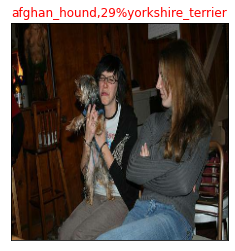

In [67]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=10)

Now we've got one function to visualize our models top prediction, let's make another to view our models top 10 predictions.

This function will:

* Take an input of prediction probabilities array and a ground truth array and an integer ✅
* Find the prediction using get_pred_label() ✅

Find the top 10:

* Prediction probabilities indexes ✅
* Prediction probabilities values ✅
* Prediction labels ✅
* Plot the top 10 prediction probability values and labels, coloring the true label green ✅

In [68]:
def plot_pred_conf(prediction_probabilities,labels,n=1):

 """
 top 10 highest predicitons with there labels
 """
 pred_prob,true_label = prediction_probabilities[n],labels[n]
 #get predicted labels
 pred_labels = get_pred_label(pred_prob)
 #find the top 10 prediciton index
 top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
 #find top 10 pred confidence level
 top_10_pred_values = pred_prob[top_10_pred_indexes]
 #find top 10 prediction labels
 top_10_pred_labels = unique_breeds[top_10_pred_indexes]

 #setup a plot
 top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                    top_10_pred_values,
                    color="grey")
 plt.xticks(np.arange(len(top_10_pred_labels)),
            labels=top_10_pred_labels,
            rotation="vertical")
 #change color of true labels
 if np.isin(true_label,top_10_pred_labels):
   top_plot[np.argmax(top_10_pred_labels==true_label)].set_color("green")
 else:
   pass
 





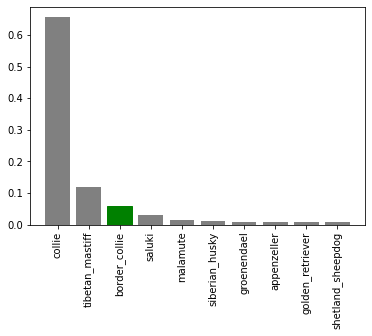

In [69]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

Now we've got some function to help us visulaize our predictions and evaluate our model,let's check out a few

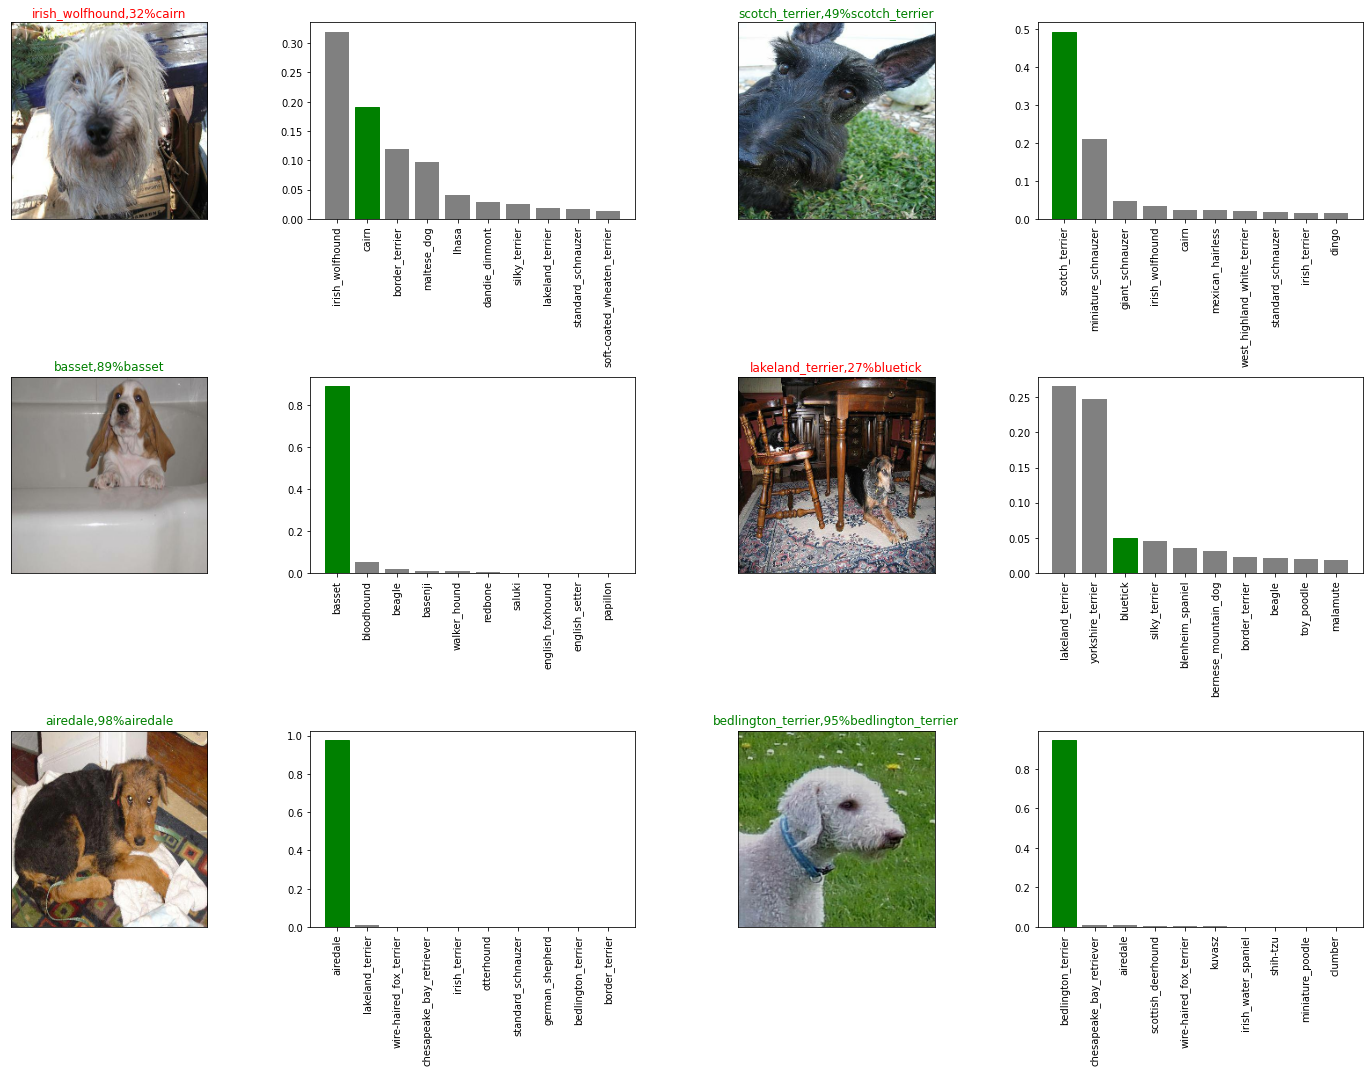

In [70]:
#let's check out few predicitions and thier diff values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(10*num_cols,5*num_rows))
for  i in range (num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_pred (prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n= i+i_multiplier)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## saving and loading model


In [71]:
#create a function to save a model
def save_model(model,suffix=None):
  """
  saves a given model
  """
  #create a model driectory
  modeldir = os.path.join("/content/drive/MyDrive/Dog vision/models",
                          datetime.datetime.now().strftime("%y%m%d-%H%M%S"))
  model_path = modeldir + "-"+ suffix +".h5"#saves format of model
  model.save(model_path)
  return model_path

In [72]:
#create a func to load model
def load_model(model_path):
  """
  loads a model
  """
  print(f"Saving model to: {model_path}...")
  model = tf.keras.models.load_model(model_path,custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [73]:
#save our model
save_model(model,suffix="1000_imaegs_mobilenetv2-Adam")

'/content/drive/MyDrive/Dog vision/models/221217-081431-1000_imaegs_mobilenetv2-Adam.h5'

In [74]:
#load pre_saved model
loaded_1000_image_model = load_model("/content/drive/MyDrive/Dog vision/models/221216-084601-1000_imaegs_mobilenetv2-Adam.h5")

Saving model to: /content/drive/MyDrive/Dog vision/models/221216-084601-1000_imaegs_mobilenetv2-Adam.h5...


In [75]:
model.evaluate(val_data)

7/7 [==============================] - 1s 89ms/step - loss: 1.3712 - accuracy: 0.6350


[1.3712044954299927, 0.6349999904632568]

In [76]:
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 90ms/step - loss: 1.2379 - accuracy: 0.6950


[1.237869381904602, 0.6949999928474426]

In [77]:
len(x),len(y)

(10222, 10222)

In [78]:
#create full data
full_data = create_data_batches(x,y)
full_data

creating train data batches...


<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [79]:
full_model = create_model()


Building a machine learning model: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [80]:
#create full model callback
full_model_tensorboard= create_tensorboard_callback()

# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=3)


In [81]:
#fir full model
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard,full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 41s 117ms/step - loss: 1.3469 - accuracy: 0.6682
Epoch 2/100
320/320 [==============================] - 37s 115ms/step - loss: 0.4009 - accuracy: 0.8820
Epoch 3/100
320/320 [==============================] - 36s 112ms/step - loss: 0.2426 - accuracy: 0.9335
Epoch 4/100
320/320 [==============================] - 37s 116ms/step - loss: 0.1540 - accuracy: 0.9645
Epoch 5/100
320/320 [==============================] - 37s 115ms/step - loss: 0.1081 - accuracy: 0.9770
Epoch 6/100
320/320 [==============================] - 35s 110ms/step - loss: 0.0784 - accuracy: 0.9860
Epoch 7/100
320/320 [==============================] - 36s 112ms/step - loss: 0.0599 - accuracy: 0.9905
Epoch 8/100
320/320 [==============================] - 37s 117ms/step - loss: 0.0456 - accuracy: 0.9943
Epoch 9/100
320/320 [==============================] - 38s 119ms/step - loss: 0.0376 - accuracy: 0.9963
Epoch 10/100
320/320 [==============================] - 37s 117m

In [82]:
save_model(full_model,suffix="full-image-set-mob")

'/content/drive/MyDrive/Dog vision/models/221217-082453-full-image-set-mob.h5'

In [83]:
loaded_full_model = load_model("/content/drive/MyDrive/Dog vision/models/221216-093427-full-image-set-mob.h5")

Saving model to: /content/drive/MyDrive/Dog vision/models/221216-093427-full-image-set-mob.h5...


## Make prediciton on test dataset

Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily we created create_data_batches() earlier which can take a list of filenames as input and conver them into Tensor batches.

To make predictions on the test data, we'll:

* Get the test image filenames. ✅
* Convert the filenames into test data batches using create_data_batches() and setting the test_data parameter to   True (since the test data doesn't have labels). ✅
* Make a predictions array by passing the test batches to the predict() method called on our model.

In [84]:
#load test imagefilenames
test_path = "/content/drive/MyDrive/Dog vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['/content/drive/MyDrive/Dog vision/test/e7129bc2dbbba99bedc87c7787cbdf1f.jpg',
 '/content/drive/MyDrive/Dog vision/test/e2537e98808877c707bfe8ca53e303b7.jpg',
 '/content/drive/MyDrive/Dog vision/test/e4a8dfc6e219b20a0cbced41eaf6a435.jpg',
 '/content/drive/MyDrive/Dog vision/test/e137b0cd96051765c349377725c4696d.jpg',
 '/content/drive/MyDrive/Dog vision/test/dce8d03553ab29570f67a28bf0ee0709.jpg',
 '/content/drive/MyDrive/Dog vision/test/dcb9aeaf9f1a5c11e95509376d8788ca.jpg',
 '/content/drive/MyDrive/Dog vision/test/e293d06016cac647cd289e2008a4623a.jpg',
 '/content/drive/MyDrive/Dog vision/test/e4ec1e1a3e21d31f6e058c04655cb38b.jpg',
 '/content/drive/MyDrive/Dog vision/test/e4e57083c3b68e91760ce6f5fcd0a2f9.jpg',
 '/content/drive/MyDrive/Dog vision/test/e596c0d97b381e876d46dda2eb60074c.jpg']

In [85]:
len(test_filenames)

10357

In [86]:
#create the data batch
test_data = create_data_batches(test_filenames,test_data=True)


creating test data batches....


In [91]:
#Make predicitons on test data
test_predictions= loaded_full_model.predict(test_data)

324/324 [==============================] - 34s 103ms/step


In [92]:
# Save predictions (NumPy array) to csv file (for access later)
np.savetxt("drive/MyDrive/Dog vision/preds_array.csv", test_predictions , delimiter=",")

In [93]:
# Load predictions (NumPy array) from csv file
test_predictions = np.loadtxt("drive/MyDrive/Dog vision/preds_array.csv", delimiter=",")

In [95]:
test_predictions[:10]

array([[1.56690680e-06, 7.75470799e-11, 6.65023947e-09, ...,
        8.56192983e-08, 9.87958160e-08, 1.40966766e-03],
       [4.86850313e-15, 2.03640205e-13, 3.81672649e-16, ...,
        8.23419363e-15, 2.77654232e-14, 2.30217950e-12],
       [8.79233075e-11, 5.01020891e-10, 1.20288536e-11, ...,
        1.37312014e-07, 1.97125382e-06, 3.86773460e-11],
       ...,
       [2.28272796e-15, 1.09362858e-07, 5.45694674e-13, ...,
        2.67872213e-09, 1.15589309e-11, 2.46130359e-14],
       [7.67745156e-12, 1.62351892e-08, 6.08255720e-12, ...,
        2.34734489e-11, 1.52737649e-11, 4.61691839e-12],
       [1.40310537e-08, 2.36744029e-07, 2.63816356e-12, ...,
        1.31953224e-11, 8.36890973e-11, 4.52766383e-12]])

In [96]:
test_predictions.shape

(10357, 120)

## Preparing data set for kaggle
It is required in a dataframe 

So we need to take following steps:
* Create a pandas dataframe with an id column as well as dog breeds
* add data to the id columns
* add data (prediction probabilites) in dog breeds
* export dataframe to kaggle


In [97]:
#create pandas datadrame
preds_df = pd.DataFrame(columns=["id"]+list(unique_breeds))

In [98]:
preds_df

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [100]:
#append test image id's to dataframe
test_id = [os.path.splitext(path)[0] for path in os.listdir(test_path)] #[0]because we dont need jpeg 
preds_df["id"] = test_id

In [101]:
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e7129bc2dbbba99bedc87c7787cbdf1f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e2537e98808877c707bfe8ca53e303b7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e4a8dfc6e219b20a0cbced41eaf6a435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e137b0cd96051765c349377725c4696d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,dce8d03553ab29570f67a28bf0ee0709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
#add prediciton probabilies to each dog breed columns
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e7129bc2dbbba99bedc87c7787cbdf1f,1.566907e-06,7.754708e-11,6.650239e-09,1.159660e-12,3.257651e-10,3.883657e-06,2.149861e-09,1.742635e-07,8.280261e-08,...,4.065079e-05,5.582531e-03,8.869100e-08,4.196218e-11,1.836104e-07,1.195846e-08,1.019983e-06,8.561930e-08,9.879582e-08,1.409668e-03
1,e2537e98808877c707bfe8ca53e303b7,4.868503e-15,2.036402e-13,3.816726e-16,2.236124e-13,2.359094e-12,2.823021e-15,5.022750e-11,4.609783e-12,1.598259e-13,...,2.741817e-12,9.568243e-15,5.770804e-15,6.420706e-14,1.012275e-14,2.755277e-14,9.872460e-15,8.234194e-15,2.776542e-14,2.302179e-12
2,e4a8dfc6e219b20a0cbced41eaf6a435,8.792331e-11,5.010209e-10,1.202885e-11,2.284297e-06,2.301393e-09,1.574982e-05,1.393154e-06,7.596912e-05,3.638835e-05,...,6.823391e-08,1.970676e-07,3.952548e-07,8.964528e-02,3.001263e-08,1.230182e-09,1.236038e-09,1.373120e-07,1.971254e-06,3.867735e-11
3,e137b0cd96051765c349377725c4696d,4.766004e-10,3.335471e-08,6.251015e-08,2.056241e-08,1.144920e-07,1.798187e-09,1.048871e-07,1.571490e-07,9.077313e-10,...,1.165393e-08,5.600446e-08,1.366164e-08,1.074786e-09,1.116569e-09,6.455270e-10,2.421832e-08,1.176398e-09,3.535502e-05,1.225561e-07
4,dce8d03553ab29570f67a28bf0ee0709,7.514064e-09,4.667694e-11,8.377081e-12,1.643684e-09,9.577755e-08,9.422074e-08,3.601901e-06,1.108266e-04,2.664827e-11,...,6.219148e-08,7.019917e-08,1.648991e-09,2.739893e-09,3.230326e-11,1.551269e-08,1.134194e-09,1.638434e-10,1.109378e-08,5.721542e-11


In [104]:
#save our predicitons 
preds_df.to_csv("/content/drive/MyDrive/Dog vision/full-model-prediciton.csv",index=False)

In [111]:
#Make predicitons on custom images
custom_path = "/content/drive/MyDrive/Dog vision/My-dog-photos/"
custom_images_path = [custom_path + fname for fname in os.listdir(custom_path)]

In [112]:
custom_images_path

['/content/drive/MyDrive/Dog vision/My-dog-photos/IMG_20221020_145415.jpg',
 '/content/drive/MyDrive/Dog vision/My-dog-photos/Snapchat-1942581997.jpg']

In [113]:
custom_data = create_data_batches(custom_images_path,test_data=True)

creating test data batches....


In [114]:
custom_preds = loaded_full_model.predict(custom_data)

1/1 [==============================] - 1s 728ms/step


In [115]:
custom_preds.shape

(2, 120)

In [118]:
custom_preds_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_preds_labels

['curly-coated_retriever', 'labrador_retriever']

In [119]:
custom_images=[]
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

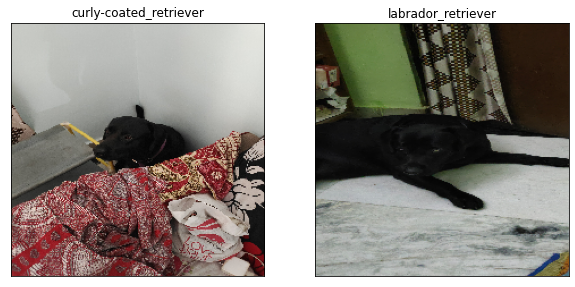

In [122]:
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 2, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_preds_labels[i])
  plt.imshow(image)